# 1.Data Understanding

This dataset offers nearly 220,000 diamond records with 25 columns of data, providing a rich resource for advanced analytics and model building, such as price prediction and grading quality. It is larger and more comprehensive compared to many similar datasets on the platform, making it highly suitable for both beginners and experienced data scientists working on regression models and exploratory data analysis





> Columns Overview




0.Unnamed: 0: Index column (likely from original data import).

1.cut: Grade of the diamond’s cut (e.g., Ideal, Premium).

2.color: Diamond color grade (D - colorless to J - light color).

3.clarity: Measures inclusions and blemishes (e.g., IF, VS1).

4.carat_weight: Weight of the diamond in carats (float).

5.cut_quality: Precision grading of the cut’s craftsmanship.

6.lab: Certification laboratory (e.g., GIA, IGI).

7.symmetry: Evaluates how symmetrical the diamond facets are.

8.polish: Quality of polishing affecting brilliance.

9.eye_clean: Whether the diamond appears clean to the naked eye.

10.culet_size: Size of the culet (point at the bottom).

11.culet_condition: Condition of the culet (e.g., None, Slightly Large).

12.depth_percent: Total depth percentage of the diamond.

13.table_percent: Table width as a percentage of the diameter.

14.meas_length: Length of the diamond in millimeters.

15.meas_width: Width of the diamond in millimeters.

16.meas_depth: Depth of the diamond in millimeters.

17.girdle_min: Minimum thickness of the girdle.

18.girdle_max: Maximum thickness of the girdle.

19.fluor_color: Color emitted under UV light.

20.fluor_intensity: Intensity of fluorescence (only 76,212 non-null entries).

21.fancy_color_dominant_color: Main fancy color (e.g., Yellow, Pink).

22.fancy_color_secondary_color: Secondary color, if present.

23.fancy_color_overtone: Overtone shade complementing the primary color.

24.fancy_color_intensity: Intensity of the fancy color (e.g., Faint, Vivid).

25.total_sales_price: The diamond’s sale price in USD.

 streamline the dataset, consider dropping columns that provide minimal impact on analysis, have high redundancy, or are irrelevant to your goals. Here are some potential columns to drop:

Unnamed: 0: Index column, redundant.


Fancy Color Columns: If focusing only on colorless diamonds, you can drop fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, and fancy_color_intensity.


Lab: If certification lab isn't crucial to the analysis.


Culet Size/Condition: These have minor impact on appearance.


Girdle Min/Max: Only if girdle details aren't relevant to your analysis.



Each choice depends on the specific objectives, like price prediction or quality analysis.


The dataset contains comprehensive details on diamonds, including attributes like cut, color, clarity, carat weight, and pricing. It is useful for exploring relationships between these factors and diamond valuation, making it ideal for regression modeling and

the diamond’s cut quality:

Table Percentage: The width of the diamond’s top flat facet (table) relative to its width. It’s calculated as
table width
diamond width
×
100
diamond width
table width
​
 ×100.

Depth Percentage: The total height of the diamond (from the table to the culet) relative to its width. It’s calculated as
depth
diamond width
×
100
diamond width
depth
​
 ×100.

Both percentages influence light reflection and the diamond’s brilliance, impacting its value.

# PROBLEM STATEMENT


given various charecteristics of diamonds,predicting the selling price of a diamond

Target:Total sale price The total price of the diamond in dollars,often influenced by the combination of all the above factor

In [ ]:
import pandas as pd
df=pd.read_csv('/content/diamonds.csv')
df



,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [ ]:
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [ ]:
df.tail()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000
219702,219703,Pear,unknown,VVS2,10.03,unknown,GIA,Very Good,Excellent,unknown,...,7.39,unknown,unknown,unknown,NaN,Yellow,unknown,unknown,Fancy Vivid,1449881


In [ ]:
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

# 2.Data cleaning





Handle missing values and correct the data types

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
cut,0
color,0
clarity,0
carat_weight,0
cut_quality,0
lab,0
symmetry,0
polish,0
eye_clean,0


In [ ]:
for column in df.columns:
   print('value counts of',column)
   print(df[column].value_counts())
   print("_"*40)

value counts of Unnamed: 0
Unnamed: 0
0         1
146461    1
146463    1
146464    1
146465    1
         ..
73239     1
73240     1
73241     1
73242     1
219703    1
Name: count, Length: 219703, dtype: int64
________________________________________
value counts of cut
cut
Round               158316
Oval                 13857
Emerald              11091
Pear                  9860
Princess              7050
Radiant               5630
Heart                 4774
Cushion Modified      3984
Marquise              2916
Asscher               1696
Cushion                529
Name: count, dtype: int64
________________________________________
value counts of color
color
E          33103
F          31566
D          30873
G          29184
H          26073
I          22364
J          16898
K          11750
unknown     9162
L           5683
M           3047
Name: count, dtype: int64
________________________________________
value counts of clarity
clarity
SI1     38627
VS2     38173
VS1     36956
SI2

In [ ]:
df.drop_duplicates()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [ ]:
df=df.drop(columns='fancy_color_dominant_color')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.87,1.79,M,M,unknown,NaN,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,2.89,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.90,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.88,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,2.83,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,14.18,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,8.81,5.71,TK,XTK,unknown,NaN,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,17.10,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,4.90,3.47,XTN,VTK,unknown,Faint,unknown,unknown,Fancy,1350000


In [ ]:
df=df.drop(columns='fancy_color_intensity')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_secondary_color,fancy_color_overtone,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.85,2.87,1.79,M,M,unknown,NaN,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,14.06,14.18,8.66,M,STK,unknown,NaN,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,11.55,8.81,5.71,TK,XTK,unknown,NaN,unknown,NaN,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,17.06,17.10,10.20,TN,M,unknown,NaN,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,5.22,4.90,3.47,XTN,VTK,unknown,Faint,unknown,unknown,1350000


In [ ]:
df=df.drop(columns='fancy_color_secondary_color')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_overtone,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,58.0,14.06,14.18,8.66,M,STK,unknown,NaN,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,65.0,11.55,8.81,5.71,TK,XTK,unknown,NaN,NaN,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,59.0,17.06,17.10,10.20,TN,M,unknown,NaN,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Faint,unknown,1350000


In [ ]:
df=df.drop(columns='eye_clean')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,...,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_overtone,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,...,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,...,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,...,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,...,58.0,14.06,14.18,8.66,M,STK,unknown,NaN,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,65.0,11.55,8.81,5.71,TK,XTK,unknown,NaN,NaN,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,...,59.0,17.06,17.10,10.20,TN,M,unknown,NaN,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,...,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Faint,unknown,1350000


In [ ]:
df=df.drop(columns='culet_condition') #Culet Size/Condition: These have minor impact on appearance
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,...,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_overtone,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,...,59.0,2.85,2.87,1.79,M,M,unknown,NaN,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,...,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,...,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,...,58.0,14.06,14.18,8.66,M,STK,unknown,NaN,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,65.0,11.55,8.81,5.71,TK,XTK,unknown,NaN,NaN,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,...,59.0,17.06,17.10,10.20,TN,M,unknown,NaN,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,...,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Faint,unknown,1350000


In [ ]:
df=df.drop(columns='fancy_color_overtone')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,unknown,NaN,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,unknown,NaN,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,unknown,NaN,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,unknown,NaN,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Faint,1350000


 fancy_color_overtone : unknown values are 217665,so its not effect to the target variable

In [ ]:
df=df.drop(columns='Unnamed: 0')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,unknown,NaN,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,unknown,NaN,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,unknown,NaN,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,unknown,NaN,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,unknown,NaN,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,unknown,NaN,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,unknown,NaN,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,unknown,NaN,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,unknown,Faint,1350000


In [ ]:
df=df.drop(columns='fluor_color')
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,NaN,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,NaN,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,NaN,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,NaN,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,NaN,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,NaN,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,Faint,1350000


In [ ]:
df=df.drop(columns='fluor_intensity')       #Reason for drop 'fluor_intensity':High Percentage of Missing Values:
df                                          # With about 66% of the entries missing, this column may not provide reliable insights.



,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


In [ ]:
df=df.drop(columns='lab')   #If certification lab isn't crucial to the analysis.
df

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200
1,Round,E,VVS2,0.09,Very Good,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,Round,E,VVS2,0.09,Very Good,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,Radiant,unknown,VS2,5.17,unknown,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,Round,E,VS1,18.07,Excellent,Excellent,Excellent,N,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,Princess,unknown,SI2,0.90,unknown,Good,Good,N,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


In [ ]:
df=df.drop(columns='culet_size') #Culet Size: These have minor impact on appearance
df

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,Round,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,Round,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,Radiant,unknown,VS2,5.17,unknown,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,Round,E,VS1,18.07,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,Princess,unknown,SI2,0.90,unknown,Good,Good,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


Girdle Min/Max: Only if girdle details aren't relevant to your analysis.

Each choice depends on the specific objectives, like price prediction or quality analysis.

In [ ]:
df=df.drop(columns='girdle_min')
df

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,200
1,Round,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,200
2,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,M,200
3,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,STK,200
4,Round,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,STK,1210692
219699,Radiant,unknown,VS2,5.17,unknown,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,XTK,1292500
219700,Round,E,VS1,18.07,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,M,1315496
219701,Princess,unknown,SI2,0.90,unknown,Good,Good,70.8,72.0,5.22,4.90,3.47,VTK,1350000


In [ ]:
df=df.drop(columns='girdle_max')
df

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,unknown,VS2,5.17,unknown,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,unknown,SI2,0.90,unknown,Good,Good,70.8,72.0,5.22,4.90,3.47,1350000


In [ ]:
df.duplicated().sum()

4172

In [ ]:
df.drop_duplicates(inplace=True)
df

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,unknown,VS2,5.17,unknown,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,unknown,SI2,0.90,unknown,Good,Good,70.8,72.0,5.22,4.90,3.47,1350000


# 3.Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215531 entries, 0 to 219702
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cut                215531 non-null  object 
 1   color              215531 non-null  object 
 2   clarity            215531 non-null  object 
 3   carat_weight       215531 non-null  float64
 4   cut_quality        215531 non-null  object 
 5   symmetry           215531 non-null  object 
 6   polish             215531 non-null  object 
 7   depth_percent      215531 non-null  float64
 8   table_percent      215531 non-null  float64
 9   meas_length        215531 non-null  float64
 10  meas_width         215531 non-null  float64
 11  meas_depth         215531 non-null  float64
 12  total_sales_price  215531 non-null  int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 23.0+ MB


In [ ]:
df.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,215531.000000,215531.000000,215531.000000,215531.000000,215531.000000,215531.000000,2.155310e+05
mean,0.757084,61.733959,57.983606,5.560928,5.141238,3.290719,6.935283e+03
std,0.843938,9.787744,9.297366,1.761124,1.367381,2.069537,2.603966e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.070000,4.800000,3.040000,1.980000e+03
75%,1.000000,63.500000,60.000000,6.360000,5.700000,3.650000,5.276000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


In [ ]:
df.head()

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,200
1,Round,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,200
2,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,200
3,Round,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,200
4,Round,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,200


In [ ]:
df.tail()

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
219698,Round,E,VS1,10.65,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,1210692
219699,Radiant,unknown,VS2,5.17,unknown,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,1292500
219700,Round,E,VS1,18.07,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,1315496
219701,Princess,unknown,SI2,0.90,unknown,Good,Good,70.8,72.0,5.22,4.90,3.47,1350000
219702,Pear,unknown,VVS2,10.03,unknown,Very Good,Excellent,66.7,65.0,15.61,11.09,7.39,1449881


In [ ]:
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'symmetry',
       'polish', 'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'total_sales_price'],
      dtype='object')

In [ ]:
print(df['color'].value_counts())


color
E          32434
F          30966
D          30434
G          28566
H          25402
I          21863
J          16653
K          11548
unknown     9092
L           5578
M           2995
Name: count, dtype: int64


In [ ]:
df['color'].unique()

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', 'unknown'],
      dtype=object)

In [ ]:
df.nunique()

,0
cut,11
color,11
clarity,11
carat_weight,878
cut_quality,6
symmetry,5
polish,5
depth_percent,534
table_percent,235
meas_length,1415


In [ ]:
df['cut'].unique()

array(['Round', 'Pear', 'Oval', 'Marquise', 'Princess', 'Emerald',
       'Heart', 'Cushion', 'Radiant', 'Cushion Modified', 'Asscher'],
      dtype=object)

# 4.Data visualisation

<Axes: xlabel='cut', ylabel='Count'>

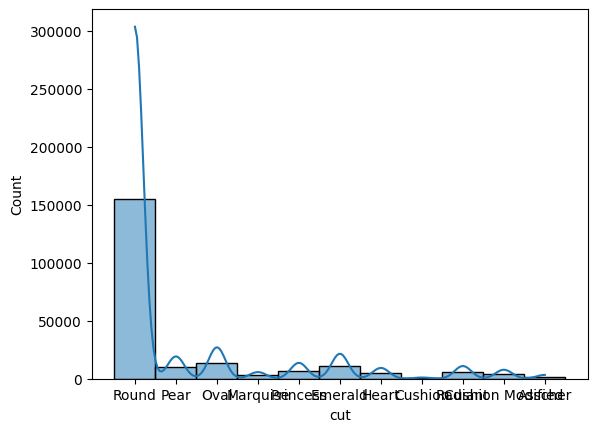

In [ ]:
# Distribution of cut
import seaborn as  sns
sns.histplot(df['cut'],kde=True)


<Axes: xlabel='carat_weight', ylabel='Count'>

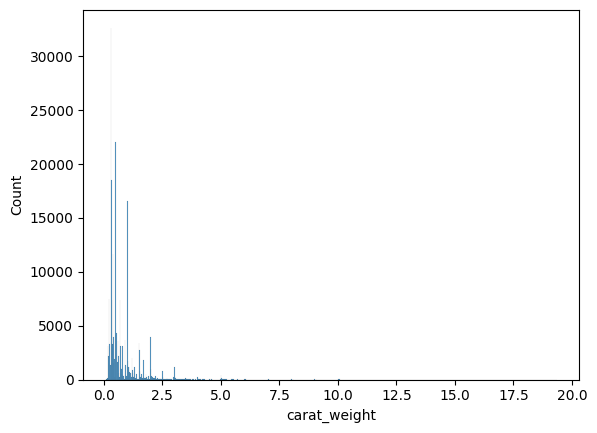

In [ ]:
# Distribution of color
sns.histplot(df['carat_weight'])

<Axes: xlabel='clarity', ylabel='Count'>

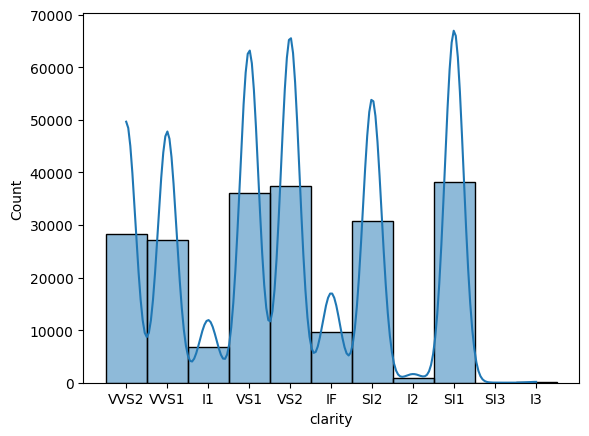

In [ ]:
# Distribution of clarity
sns.histplot(df['clarity'], kde=True)

# 5.Correlation analysis

## labbel encoding

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['cut'] = labelencoder.fit_transform(df['cut'])
df['color'] = labelencoder.fit_transform(df['color'])
df['clarity'] = labelencoder.fit_transform(df['clarity'])
df['cut_quality'] = labelencoder.fit_transform(df['cut_quality'])
df['symmetry']=labelencoder.fit_transform(df['symmetry'])
df['polish']=labelencoder.fit_transform(df['polish'])
df

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,10,1,10,0.09,0,4,4,62.7,59.0,2.85,2.87,1.79,200
1,10,1,10,0.09,4,4,4,61.9,59.0,2.84,2.89,1.78,200
2,10,1,10,0.09,0,4,4,61.1,59.0,2.88,2.90,1.77,200
3,10,1,10,0.09,0,4,4,62.0,59.0,2.86,2.88,1.78,200
4,10,1,10,0.09,4,4,0,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,61.3,58.0,14.06,14.18,8.66,1210692
219699,9,10,8,5.17,5,4,4,64.8,65.0,11.55,8.81,5.71,1292500
219700,10,1,7,18.07,0,0,0,60.2,59.0,17.06,17.10,10.20,1315496
219701,8,10,5,0.90,5,2,2,70.8,72.0,5.22,4.90,3.47,1350000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
correlation_matrix=df.corr()    #measure the relationship between features (variables) in a dataset.
                                #Correlation coefficients indicate the strength and
                                #direction of the linear relationship between two variables.
correlation_matrix

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
cut,1.000000,-0.150986,0.009545,-0.230915,-0.686391,-0.394820,-0.196069,-0.128204,-0.158327,-0.339485,-0.023520,-0.047342,-0.105175
color,-0.150986,1.000000,-0.054615,0.202787,0.131466,0.043325,0.063401,0.021362,-0.024592,0.187385,0.187547,0.083738,0.059733
clarity,0.009545,-0.054615,1.000000,-0.079721,-0.047600,-0.039871,-0.062849,0.032480,0.027328,-0.123617,-0.111113,-0.039633,-0.005641
carat_weight,-0.230915,0.202787,-0.079721,1.000000,0.198630,0.038506,0.003646,0.059829,0.088875,0.783887,0.793032,0.348230,0.744358
cut_quality,-0.686391,0.131466,-0.047600,0.198630,1.000000,0.625925,0.321032,0.131144,0.169397,0.333538,0.008794,0.047971,0.076483
symmetry,-0.394820,0.043325,-0.039871,0.038506,0.625925,1.000000,0.366292,0.062904,0.083532,0.132185,-0.069984,-0.008708,-0.009111
polish,-0.196069,0.063401,-0.062849,0.003646,0.321032,0.366292,1.000000,-0.012209,0.016338,0.042623,-0.076271,-0.011769,-0.002775
depth_percent,-0.128204,0.021362,0.032480,0.059829,0.131144,0.062904,-0.012209,1.000000,0.708900,0.114267,0.102151,0.079008,0.024338
table_percent,-0.158327,-0.024592,0.027328,0.088875,0.169397,0.083532,0.016338,0.708900,1.000000,0.155945,0.131421,0.078582,0.043500
meas_length,-0.339485,0.187385,-0.123617,0.783887,0.333538,0.132185,0.042623,0.114267,0.155945,1.000000,0.786251,0.336849,0.488365


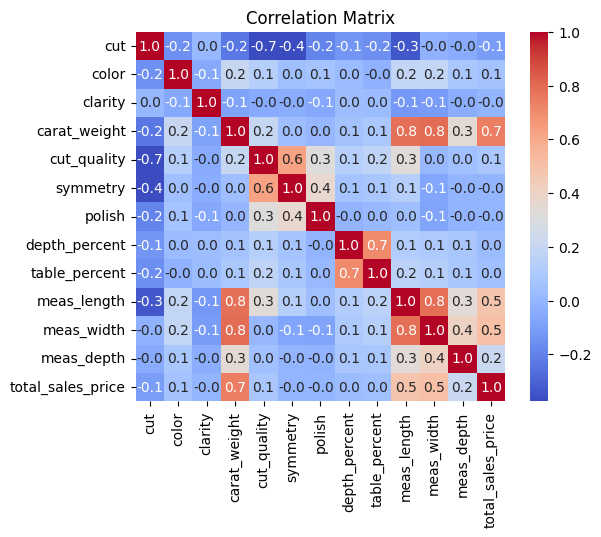

In [ ]:
# Heatmap of correlation matrix
#sns.heatmap(corr_matrix, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs))
sns.heatmap(correlation_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.title('Correlation Matrix')
plt.show()

# 6.Outlier detection

In [ ]:
print(df)
print(len(df))

        cut  color  clarity  carat_weight  cut_quality  symmetry  polish  \
0        10      1       10          0.09            0         4       4   
1        10      1       10          0.09            4         4       4   
2        10      1       10          0.09            0         4       4   
3        10      1       10          0.09            0         4       4   
4        10      1       10          0.09            4         4       0   
...     ...    ...      ...           ...          ...       ...     ...   
219698   10      1        7         10.65            0         0       0   
219699    9     10        8          5.17            5         4       4   
219700   10      1        7         18.07            0         0       0   
219701    8     10        5          0.90            5         2       2   
219702    7     10       10         10.03            5         4       0   

        depth_percent  table_percent  meas_length  meas_width  meas_depth  \
0         

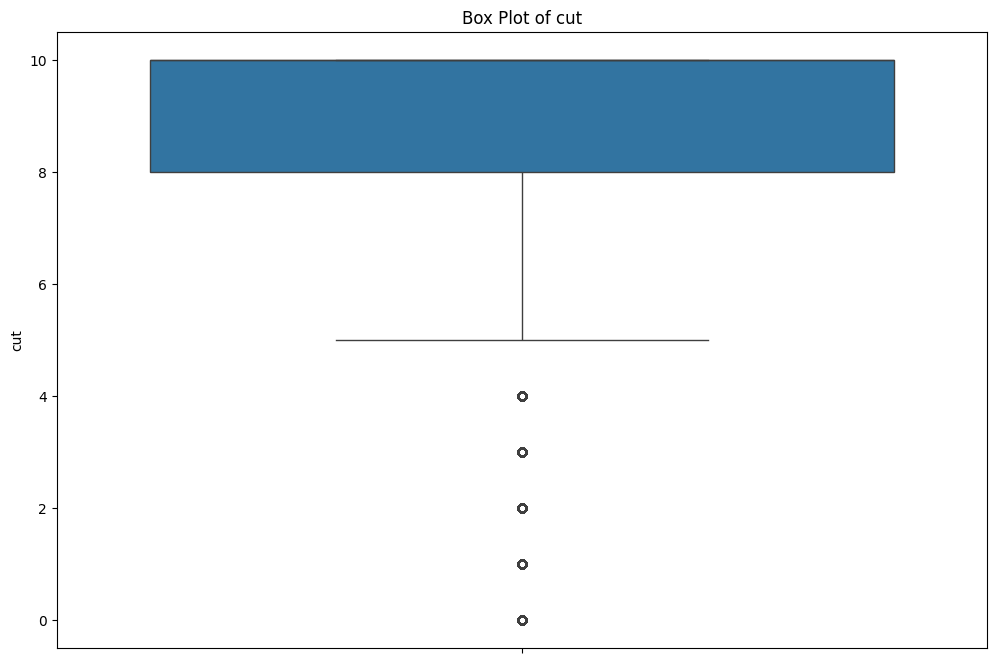

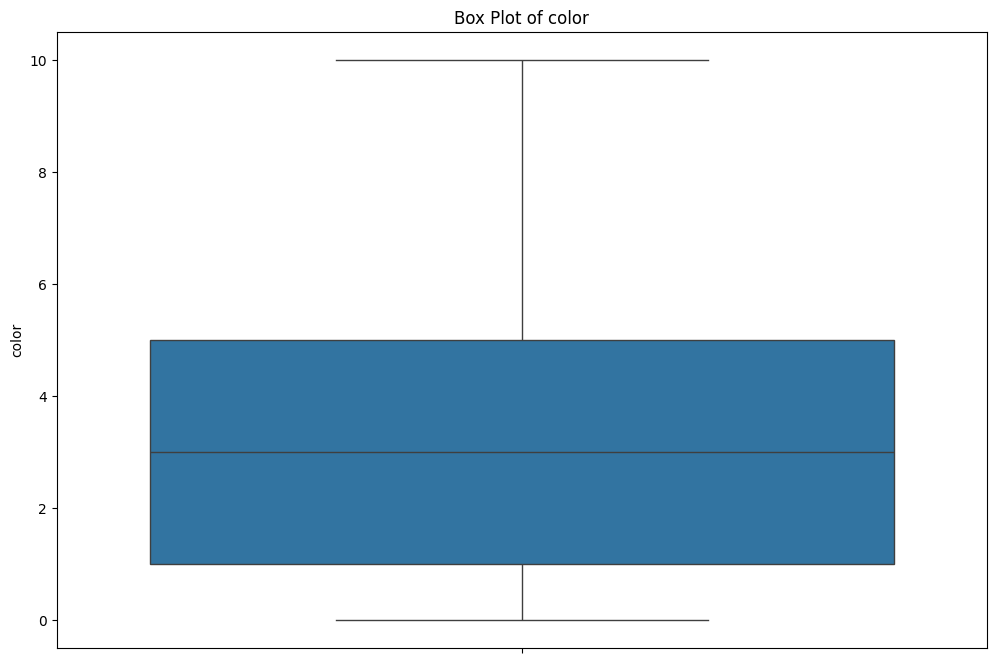

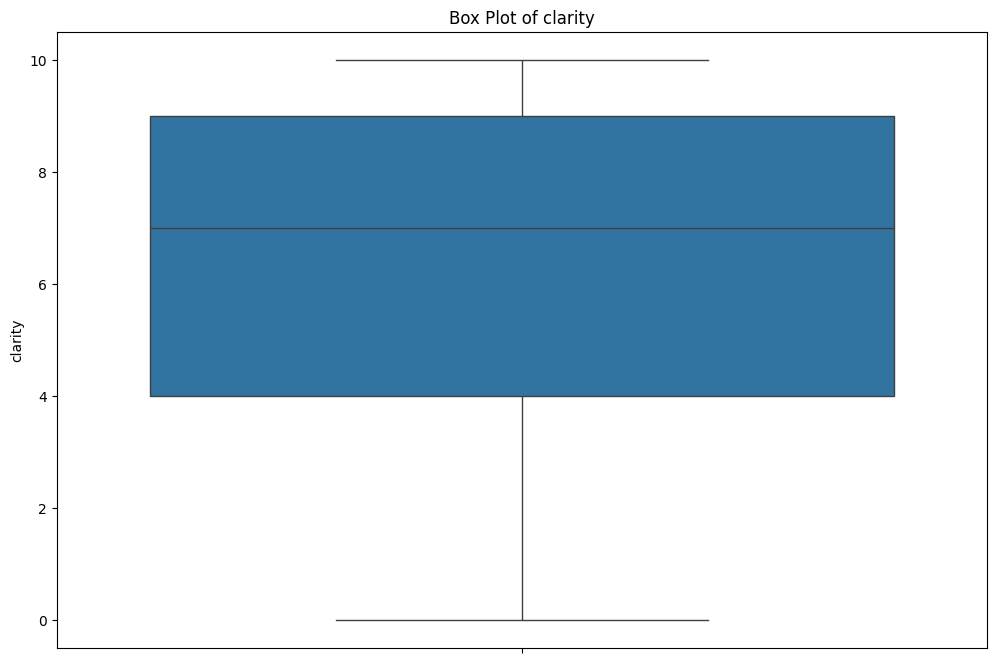

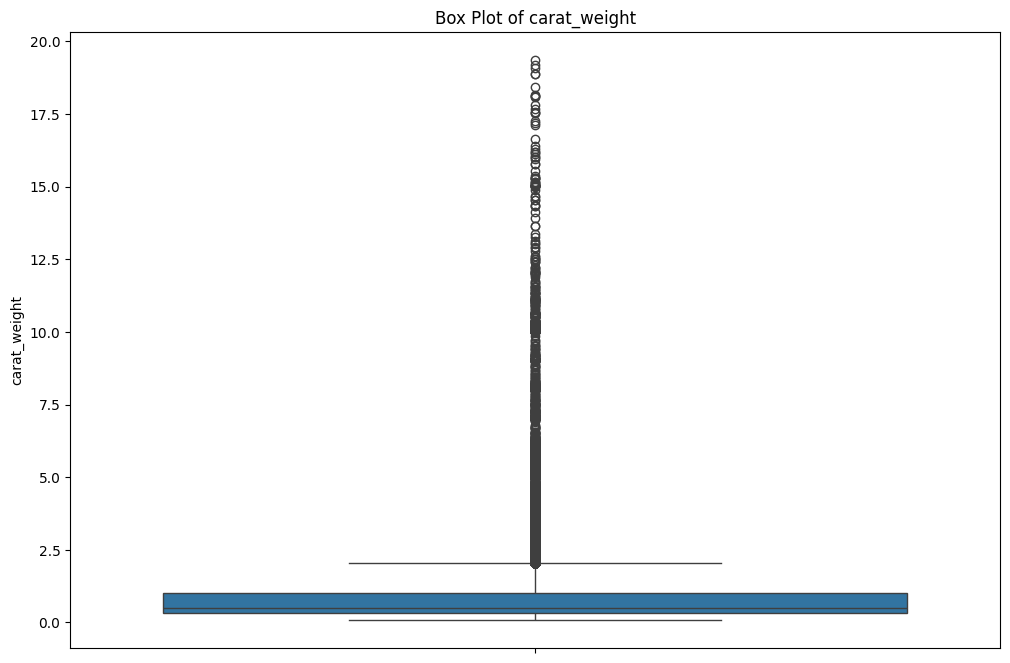

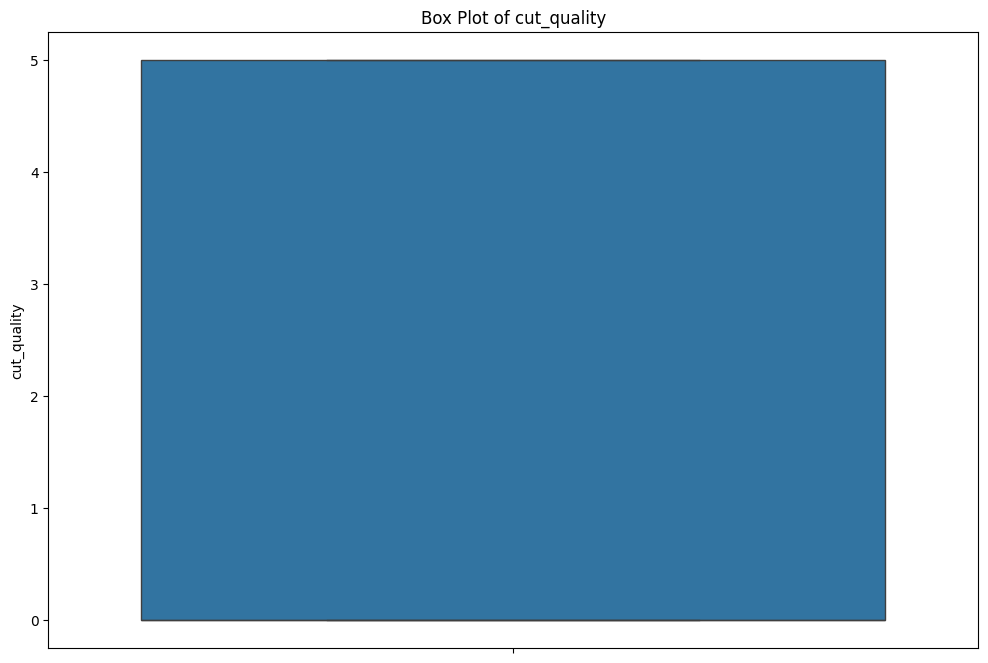

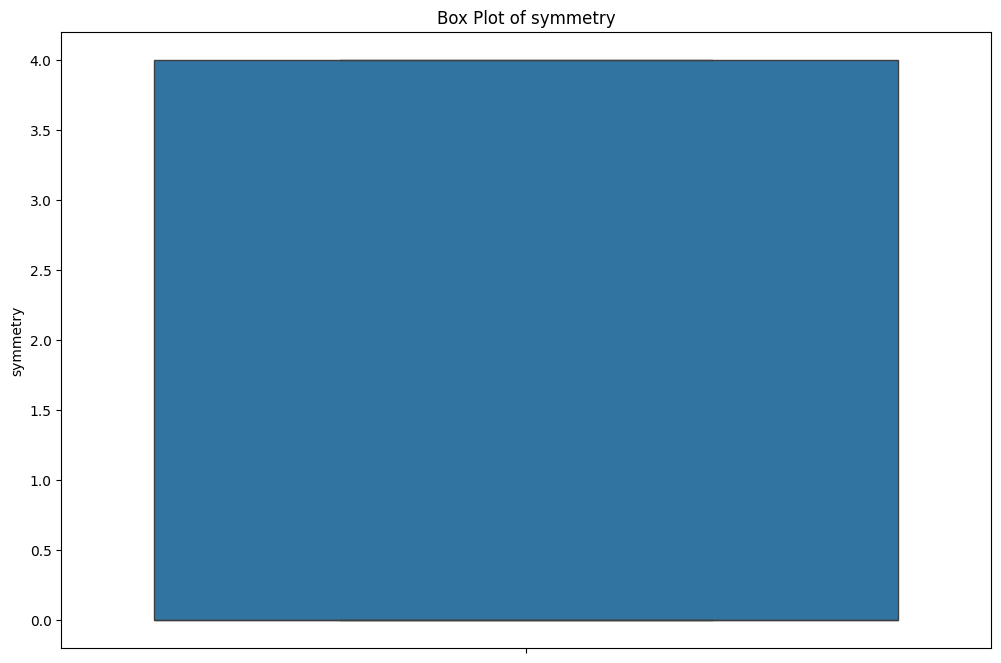

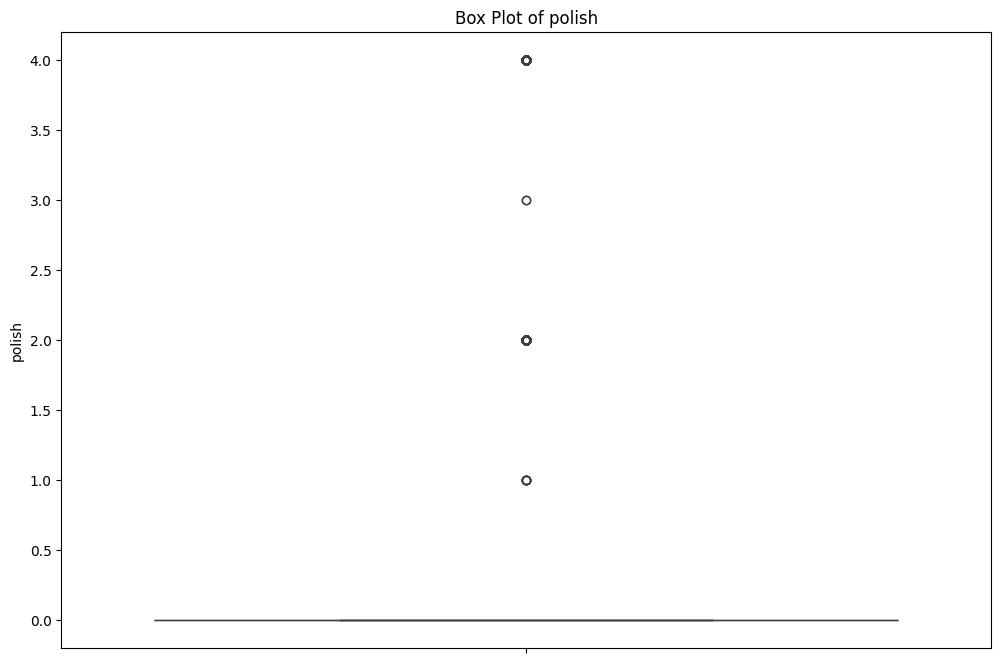

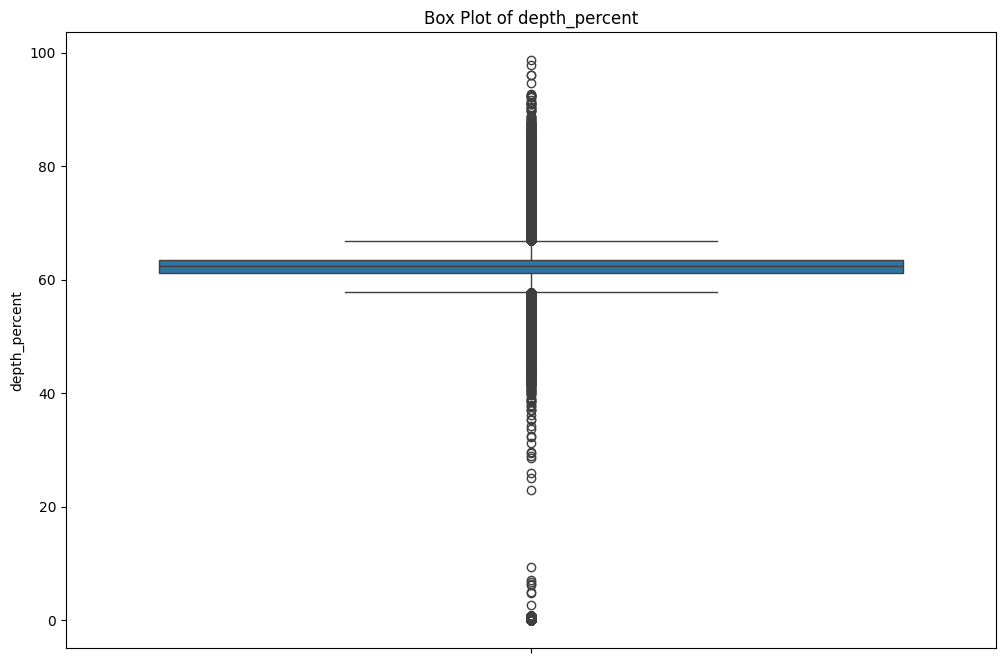

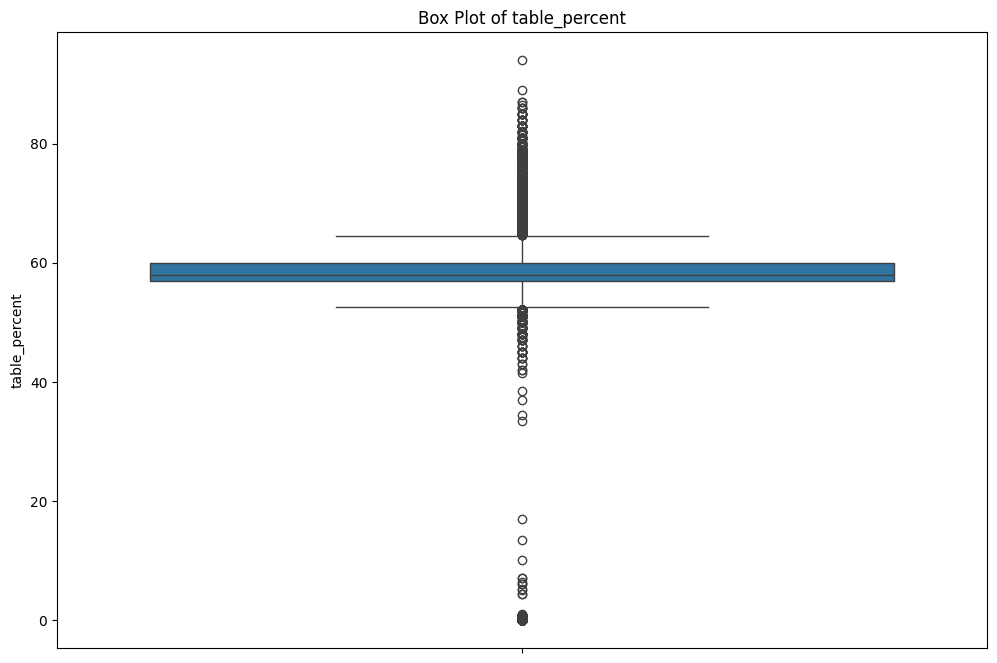

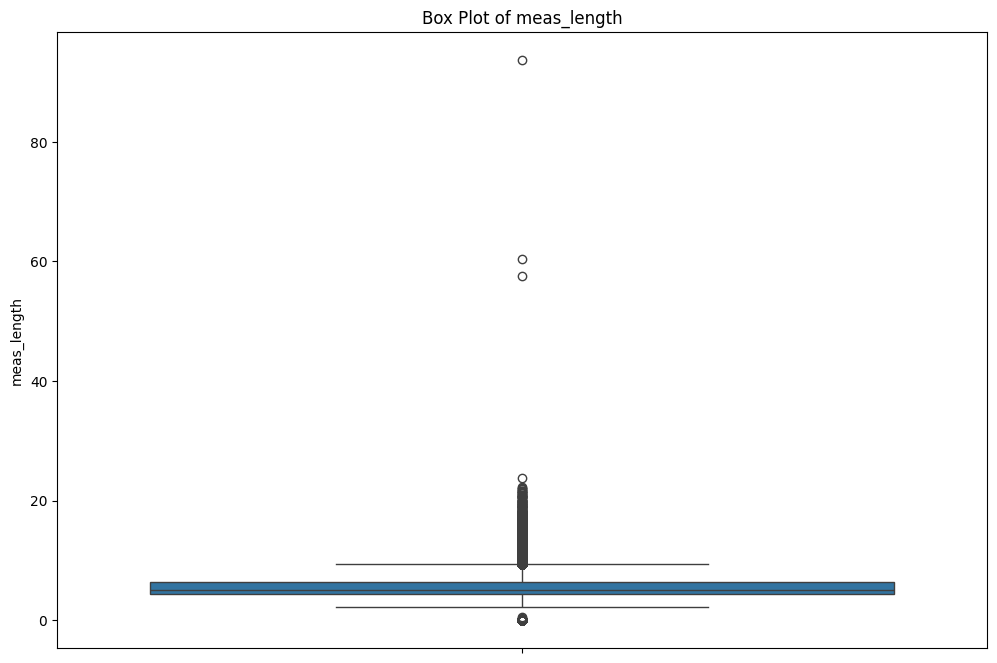

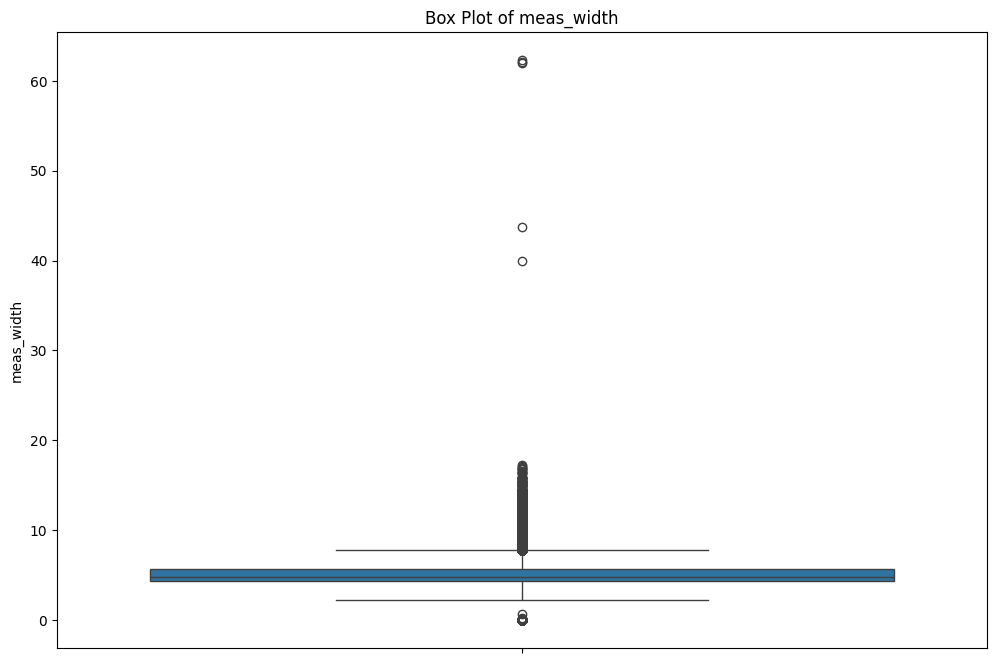

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List of features for which you want box plots
features = ['cut','color','clarity','carat_weight','cut_quality','symmetry','polish','depth_percent','table_percent','meas_length','meas_width']

# Create box plots for each feature
for feature in features:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()


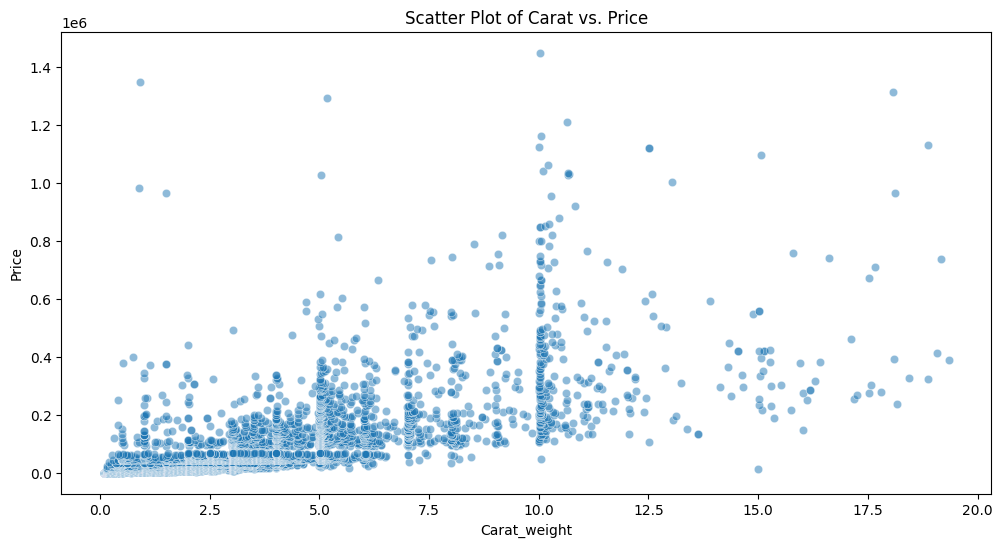

In [ ]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='carat_weight', y='total_sales_price', alpha=0.5)
plt.title('Scatter Plot of Carat vs. Price')
plt.xlabel('Carat_weight')
plt.ylabel('Price')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

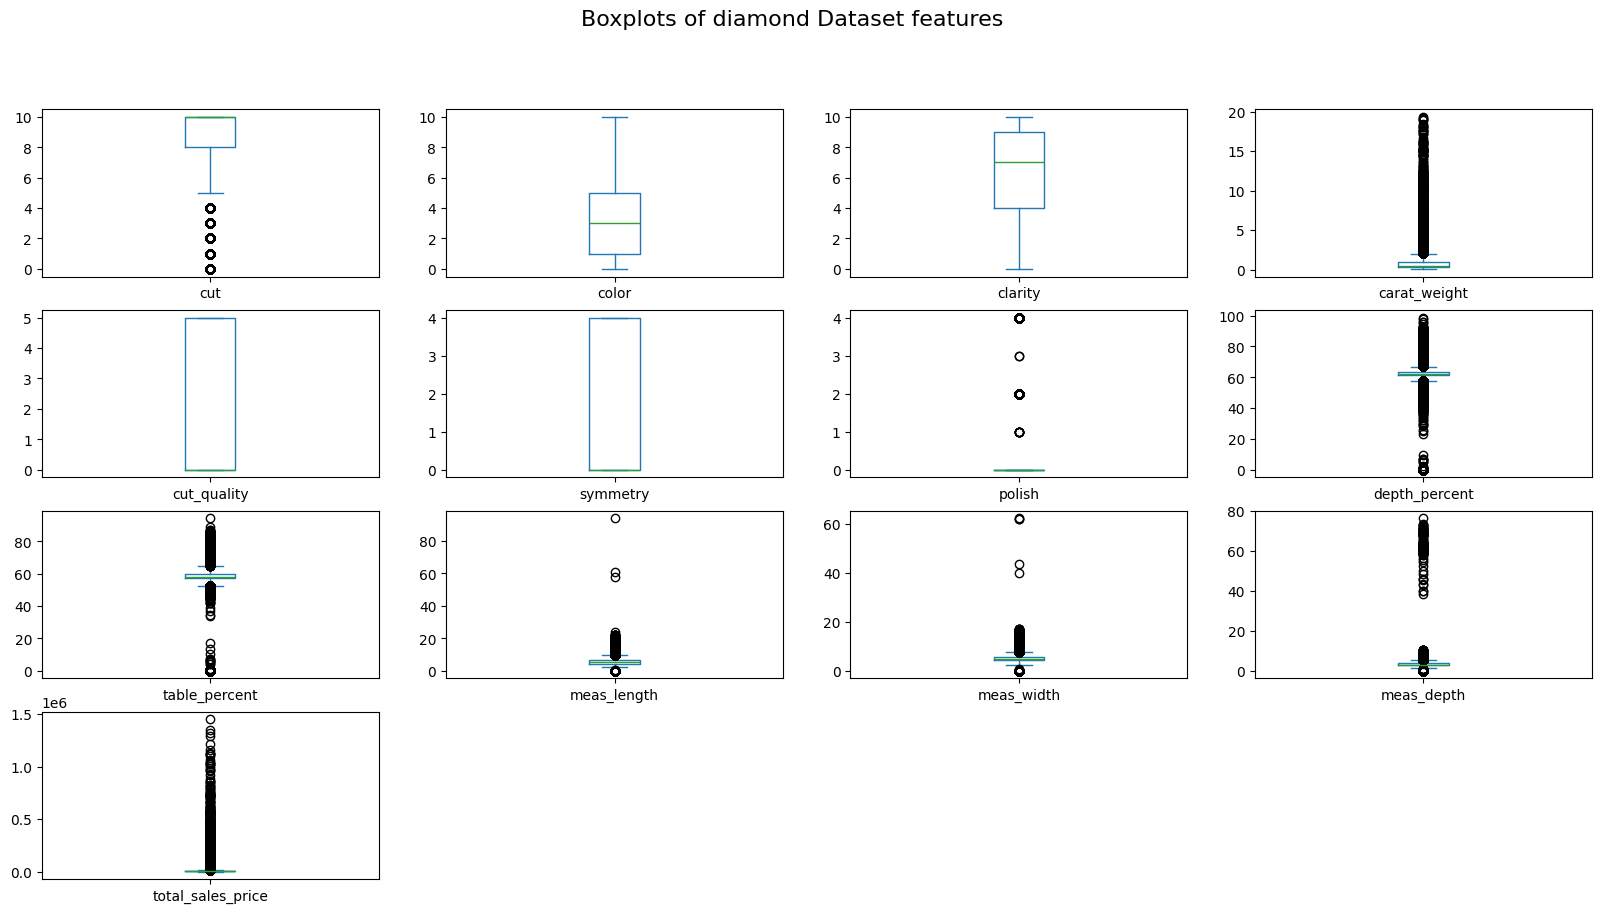

In [ ]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,10))
plt.suptitle('Boxplots of diamond Dataset features',fontsize=16)
plt.show

Calculate IQR: Identify values outside the
[
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
,
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
]
[Q1−1.5×IQR,Q3+1.5×IQR] range.



In [ ]:
import pandas as pd

# Calculate Q1 and Q3 for the 'price' column
Q1 = df['carat_weight'].quantile(0.25)
Q3 = df['carat_weight'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_filtered = df[(df['carat_weight'] >= Q1 - 1.5 * IQR) & (df['carat_weight'] <= Q3 + 1.5 * IQR)]

# Display the filtered dataset
print(df_filtered)


        cut  color  clarity  carat_weight  cut_quality  symmetry  polish  \
0        10      1       10          0.09            0         4       4   
1        10      1       10          0.09            4         4       4   
2        10      1       10          0.09            0         4       4   
3        10      1       10          0.09            0         4       4   
4        10      1       10          0.09            4         4       0   
...     ...    ...      ...           ...          ...       ...     ...   
219524    9     10        7          0.76            5         2       4   
219559    6     10        7          2.01            5         2       4   
219683    7     10        8          1.51            5         4       4   
219684    9     10        0          0.89            5         2       2   
219701    8     10        5          0.90            5         2       2   

        depth_percent  table_percent  meas_length  meas_width  meas_depth  \
0         

# 7.Feature engineering

In [ ]:
df['new Feature']=df['meas_length']*df['meas_width']

In [ ]:
# column_name='meas_width'
# desired_column = df[column_name]*2
# print(desired_column)


In [ ]:
df=df.rename(columns={'meas_width':'width','meas_length': 'length'})
df


,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,length,width,meas_depth,total_sales_price,new Feature
0,10,1,10,0.09,0,4,4,62.7,59.0,2.85,2.87,1.79,200,8.1795
1,10,1,10,0.09,4,4,4,61.9,59.0,2.84,2.89,1.78,200,8.2076
2,10,1,10,0.09,0,4,4,61.1,59.0,2.88,2.90,1.77,200,8.3520
3,10,1,10,0.09,0,4,4,62.0,59.0,2.86,2.88,1.78,200,8.2368
4,10,1,10,0.09,4,4,0,64.9,58.5,2.79,2.83,1.82,200,7.8957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,10,1,7,10.65,0,0,0,61.3,58.0,14.06,14.18,8.66,1210692,199.3708
219699,9,10,8,5.17,5,4,4,64.8,65.0,11.55,8.81,5.71,1292500,101.7555
219700,10,1,7,18.07,0,0,0,60.2,59.0,17.06,17.10,10.20,1315496,291.7260
219701,8,10,5,0.90,5,2,2,70.8,72.0,5.22,4.90,3.47,1350000,25.5780


# 8.Dimensionality reduction

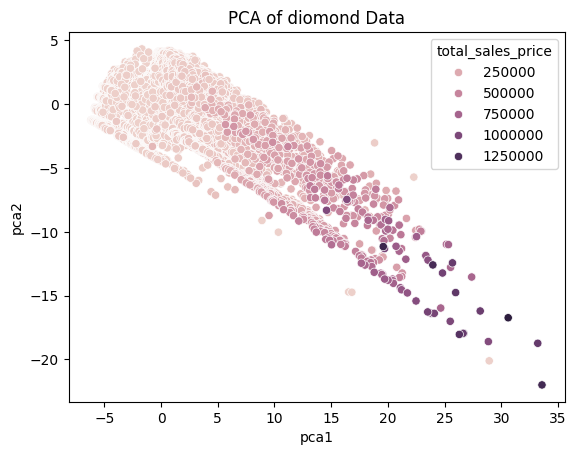

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['cut','color','clarity','carat_weight','cut_quality','symmetry','polish','depth_percent','table_percent','length','width','total_sales_price']
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='total_sales_price', data=df)
plt.title('PCA of diomond Data')
plt.show()

# 9.Data scaling

Standardization: Transforms the data to have a mean of 0 and a standard deviation of 1.

Normalization: Rescales the data to a fixed range, typically between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['cut_scaled', 'carat_weight_scaled']] = scaler.fit_transform(df[['cut', 'carat_weight']])
print(df[['cut_scaled', 'carat_weight_scaled']] )

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[['cut_normalized', 'carat_weight_normalized']] = minmax_scaler.fit_transform(df[['cut', 'carat_weight']])
print(df[['cut_normalized', 'carat_weight_normalized']] )

        cut_scaled  carat_weight_scaled
0         0.538372            -0.790444
1         0.538372            -0.790444
2         0.538372            -0.790444
3         0.538372            -0.790444
4         0.538372            -0.790444
...            ...                  ...
219698    0.538372            11.722350
219699    0.120125             5.228968
219700    0.538372            20.514484
219701   -0.298121             0.169344
219702   -0.716368            10.987698

[215531 rows x 2 columns]
        cut_normalized  carat_weight_normalized
0                  1.0                 0.000519
1                  1.0                 0.000519
2                  1.0                 0.000519
3                  1.0                 0.000519
4                  1.0                 0.000519
...                ...                      ...
219698             1.0                 0.548521
219699             0.9                 0.264141
219700             1.0                 0.933576
219701       

# 10.initial modelling

In [ ]:
y=df['total_sales_price'] #extracting target variable column
x=df.drop(columns=['total_sales_price']) #creating training variable by dropping

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#print the shapes of the resulting dataset to verify split
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (172424, 19)
x_test shape: (43107, 19)
y_train shape: (172424,)
y_test shape: (43107,)


In [ ]:
x_train

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,length,width,meas_depth,new Feature,pca1,pca2,cut_scaled,carat_weight_scaled,cut_normalized,carat_weight_normalized
25464,10,5,8,0.30,4,4,4,62.7,58.0,4.15,4.21,2.70,17.4715,-0.468857,2.009547,0.538372,-0.541610,1.0,0.011417
214154,10,3,8,2.01,0,0,0,62.8,58.0,8.01,8.07,5.05,64.6407,2.007539,-2.614307,0.538372,1.484610,1.0,0.100156
108495,10,2,5,0.50,4,4,0,61.6,60.0,5.06,5.09,3.13,25.7554,-0.116909,0.817734,0.538372,-0.304625,1.0,0.021796
48120,10,4,10,0.30,4,4,4,63.3,57.0,4.19,4.21,2.66,17.6399,-0.579385,2.000163,0.538372,-0.541610,1.0,0.011417
192830,10,4,8,1.26,0,0,0,62.4,58.0,6.87,6.90,4.30,47.4030,0.683615,-1.848080,0.538372,0.595917,1.0,0.061235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122472,10,1,9,0.45,4,4,4,63.4,60.0,4.79,4.85,3.06,23.2315,-0.213353,1.784577,0.538372,-0.363871,1.0,0.019201
105934,10,3,3,0.40,0,0,0,59.9,61.0,4.76,4.78,2.86,22.7528,-1.048172,-0.879434,0.538372,-0.423117,1.0,0.016606
134961,8,0,5,0.70,5,4,4,0.0,0.0,0.00,0.00,0.00,0.0000,-4.299610,1.746268,-0.298121,-0.067640,0.8,0.032174
150211,10,7,5,1.00,0,4,0,62.1,54.0,6.38,6.40,3.97,40.8320,0.662649,-0.632097,0.538372,0.287837,1.0,0.047743


In [ ]:
x_test

,cut,color,clarity,carat_weight,cut_quality,symmetry,polish,depth_percent,table_percent,length,width,meas_depth,new Feature,pca1,pca2,cut_scaled,carat_weight_scaled,cut_normalized,carat_weight_normalized
11277,10,0,7,0.20,0,0,0,59.7,60.0,3.81,3.83,2.28,14.5923,-2.025336,-0.544953,0.538372,-0.660102,1.0,0.006227
70618,10,1,8,0.31,0,0,0,62.3,59.0,4.31,4.33,2.69,18.6623,-1.623938,-0.700360,0.538372,-0.529761,1.0,0.011936
104774,3,0,7,0.46,5,4,4,68.5,63.0,5.06,3.60,2.47,18.2160,0.508719,3.535230,-2.389354,-0.352022,0.3,0.019720
188229,4,2,7,1.20,5,4,0,54.1,58.0,6.96,7.29,3.94,50.7384,2.155285,0.960454,-1.971107,0.524821,0.4,0.058121
20835,10,3,5,0.32,4,0,0,62.1,56.0,4.36,4.39,2.72,19.1404,-0.970184,0.055618,0.538372,-0.517911,1.0,0.012455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45877,10,2,4,0.30,0,0,0,62.1,55.0,4.28,4.31,2.67,18.4468,-1.544763,-0.769619,0.538372,-0.541610,1.0,0.011417
86214,10,4,9,0.35,0,0,0,62.5,57.0,4.49,4.52,2.82,20.2948,-1.378006,-0.781418,0.538372,-0.482364,1.0,0.014011
54968,10,2,8,0.30,4,4,0,58.8,64.0,4.34,4.36,2.56,18.9224,-0.711489,1.140058,0.538372,-0.541610,1.0,0.011417
165298,7,10,5,1.51,5,2,4,68.9,53.0,9.26,5.66,3.90,52.4116,2.758119,1.177634,-0.716368,0.892148,0.7,0.074209


In [ ]:
y_train

,total_sales_price
25464,776
214154,33768
108495,1876
48120,918
192830,12122
...,...
122472,2480
105934,1786
134961,3140
150211,3744


In [ ]:
y_test

,total_sales_price
11277,646
70618,1056
104774,1814
188229,9360
20835,738
...,...
45877,900
86214,1256
54968,964
165298,5436


In [ ]:
X

array([[ 0.53837171, -0.90056558,  1.36748526, ..., -1.53932045,
        -1.66101747, -0.25865537],
       [ 0.53837171, -0.90056558,  1.36748526, ..., -1.54499866,
        -1.64639093, -0.25865537],
       [ 0.53837171, -0.90056558,  1.36748526, ..., -1.52228584,
        -1.63907766, -0.25865537],
       ...,
       [ 0.53837171, -0.90056558,  0.16997723, ...,  6.52940965,
         8.74576504, 50.25271424],
       [-0.29812124,  2.4672152 , -0.62836145, ..., -0.19358573,
        -0.17642376, 51.57777286],
       [-0.71636772,  2.4672152 ,  1.36748526, ...,  5.70606985,
         4.35049007, 55.41350726]])

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[ 0.53837171,  0.59622588,  0.56914658, ..., -0.80115373,
         -0.68103935, -0.23653522],
        [ 0.53837171, -0.15216985,  0.56914658, ...,  1.39063362,
          2.14188268,  1.03045799],
        [ 0.53837171, -0.52636772, -0.62836145, ..., -0.28443702,
         -0.03747164, -0.19429187],
        ...,
        [-0.29812124, -1.27476345, -0.62836145, ..., -3.15760904,
         -3.75992582, -0.14575042],
        [ 0.53837171,  1.34462161, -0.62836145, ...,  0.46508611,
          0.92056667, -0.12255499],
        [-1.1346142 , -1.27476345,  1.36748526, ...,  0.52754637,
         -0.35194223, -0.16748655]]),
 array([[ 0.53837171, -1.27476345,  0.16997723, ..., -0.99421272,
         -0.9589436 , -0.24152762],
        [ 0.53837171, -0.90056558,  0.56914658, ..., -0.71030244,
         -0.59328012, -0.22578237],
        [-2.38935363, -1.27476345,  0.16997723, ..., -0.28443702,
         -1.12714879, -0.19667286],
        ...,
        [ 0.53837171, -0.52636772,  0.56914658, ..., -

In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),


}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Define features and target variable
X = df.drop(columns=["total_sales_price"])
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialie and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions onthe test set
y_pred=model.predict(X_test)

Mean_sqrd_error=mean_squared_error(y_test,y_pred)
Mean_abslt_error=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MAE:{Mean_abslt_error:.2f}")
print(f"MSE:{Mean_sqrd_error:.2f}")
print(f"R2:{r2:.2f}")

MAE:0.00
MSE:0.00
R2:1.00


In [ ]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Define features and target variable
X = df.drop(columns=["total_sales_price"])
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialie and train the Decision Regression model
model =  DecisionTreeRegressor()
model.fit(X_train, y_train)

#Make predictions onthe test set
y_pred=model.predict(X_test)

Mean_sqrd_error=mean_squared_error(y_test,y_pred)
Mean_abslt_error=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MAE:{Mean_abslt_error:.2f}")
print(f"MSE:{Mean_sqrd_error:.2f}")
print(f"R2:{r2:.2f}")

MAE:1041.73
MSE:83182704.15
R2:0.89


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Define features and target variable
X = df.drop(columns=["total_sales_price"])
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialie and train the  RandomForestRegression model
model =  RandomForestRegressor()
model.fit(X_train, y_train)

#Make predictions onthe test set
y_pred=model.predict(X_test)

Mean_sqrd_error=mean_squared_error(y_test,y_pred)
Mean_abslt_error=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MAE:{Mean_abslt_error:.2f}")
print(f"MSE:{Mean_sqrd_error:.2f}")
print(f"R2:{r2:.2f}")

MAE:758.48
MSE:27963026.49
R2:0.96


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Define features and target variable
X = df.drop(columns=["total_sales_price"])
y = df['total_sales_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialie and train the  GradientBoostingRegression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#Make predictions onthe test set
y_pred=model.predict(X_test)

Mean_sqrd_error=mean_squared_error(y_test,y_pred)
Mean_abslt_error=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MAE:{Mean_abslt_error:.2f}")
print(f"MSE:{Mean_sqrd_error:.2f}")
print(f"R2:{r2:.2f}")

# Documentation and reporting

In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with Survival': df.corr()['total_sales_price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling

final_df = df[['cut', 'carat_weight', 'color', 'total_sales_price']]

**Linear Regression**

MAE: 0.00 (suspiciously perfect result)

MSE: 0.00 (suspiciously perfect result)

R²: 1.00 (suspiciously perfect result)



**Decision Tree Regressor**
MAE:1037.71

MSE:52394907.59

R2:0.93

**Random Forest Regressor**

MAE:754.82

MSE:27134909.57

R2:0.96



**Gradient Boosting Regressor**
MAE:1313.91

MSE:23485851.77

R2:0.97



Summary of Comparison

Best Model by MAE (Average Error):

Random Forest has the lowest MAE, suggesting it provides the smallest average prediction error.
Best Model by MSE (Error Squared):

Gradient Boosting has the lowest MSE, which penalizes larger errors more heavily, indicating it might handle extreme cases or outliers better.
Best Model by R² Score (Variance Explained):

Gradient Boosting also has the highest R² (0.97), meaning it explains the largest portion of variance in the target variable.

Linear Regression Issue:

The Linear Regression results are unrealistic (perfect R², MAE, and MSE). This is likely due to a data leakage issue or an error in the dataset structure, so Linear Regression’s results should be disregarded here until verified.


